### Business Goal

     We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Display descriptions for each feature.
descriptions = {
    'car_ID': "Unique identifier for each car",
    'symboling': "Insurance risk rating for the car",
    'CarName': "Name or model of the car",
    'fueltype': "Type of fuel used (gas or diesel)",
    'aspiration': "Method of air intake for the engine (std or turbo)",
    'doornumber': "Number of doors on the car",
    'carbody': "Type of car body or design (sedan, hatchback, etc.)",
    'drivewheel': "Type of drivetrain or wheels (FWD, RWD, 4WD)",
    'enginelocation': "Engine location (front or rear)",
    'wheelbase': "Distance between front and rear axles",
    'carlength': "Length of the car",
    'carwidth': "Width of the car",
    'carheight': "Height of the car",
    'curbweight': "Weight of the car without passengers or cargo",
    'enginetype': "Type of engine (ohc, ohcv, etc.)",
    'cylindernumber': "Number of cylinders in the engine",
    'enginesize': "Size of the engine (in cc or ci)",
    'fuelsystem': "Type of fuel injection system (mpfi, etc.)",
    'boreratio': "Ratio of cylinder bore diameter to stroke length",
    'stroke': "Length of the engine stroke",
    'compressionratio': "Engine compression ratio",
    'horsepower': "Engine power output (in hp)",
    'peakrpm': "Engine's peak RPM for generating power",
    'citympg': "Fuel efficiency in city driving (mpg)",
    'highwaympg': "Fuel efficiency on the highway (mpg)",
    'price': "Price of the car"
}

### Import Libraries

In [7]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Train-test split
from sklearn.model_selection import train_test_split
# Min-max scling
from sklearn.preprocessing import MinMaxScaler
# Statsmodel 
import statsmodels.api as sm
# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#R-squared
from sklearn.metrics import r2_score
# Importing LinearRegression
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.gofplots import qqplot
# Supress warning
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [9]:
pd.set_option('display.max_columns',None)
%matplotlib inline

### Read the csv file

In [10]:
# Read the data
df=pd.read_csv('carprice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


### Shape and size of the dataset

In [12]:
df.shape

(205, 26)

In [13]:
df.size

5330

*The dataset consists of 205 rows and 26 columns and there are 5330 observations.*

In [14]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

### Information of the dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

*The dataset consists of 16 numerical type variables and 10 object type variables.*

### Descriptive statistics 

In [16]:
# To describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


**Observations:** 
*1 . The symboling ,carheight,curbweight ,peakrpm,citympg,highwaympg column slightly follows a normal distribution*

*2 . wheelbase column has slightly skewed to the right*

*3 . carlength column follows a normal distribution*

*4 . carwidth column has slightly right skewed*

*5 . enginesize column has skewed to the right*

*6 . boreratio column seems like a bi-model curve*

*7 . stroke skewed to the left*

*8 . compressionratio has highly skewed to the right*

*9 . horsepower has skewed to the right*

*10. price column skewed to the right* 


In [17]:
# Descriptive statistics for the categorical columns
df.describe(include=object).T

,count,unique,top,freq
CarName,205,147,toyota corona,6
fueltype,205,2,gas,185
aspiration,205,2,std,168
doornumber,205,2,four,115
carbody,205,5,sedan,96
drivewheel,205,3,fwd,120
enginelocation,205,2,front,202
enginetype,205,7,ohc,148
cylindernumber,205,7,four,159
fuelsystem,205,8,mpfi,94


**Observations:**

*1 . The primary source of fuel type is 'gas'*

*2 . The primary aspiration of the car is to meet industry 'standards'*

*3 . The most common doornumber is 'four'*

*4 . The most common type of car body is the 'sedan'*

*5 . The most common context of a driveway is 'forward'*

*6 . The most common car engine location is at the front.*

*7 . The top engine type is 'ohc' in our data*

*8 . The top cylinder number is 'four'*

*9 . The most common fuel system type is 'mpfi'*

*10. The most common car company name is 'Toyota'*


### Handling missing values

In [18]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False) 

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


*We can see that There is no missing values in our dataset*

In [19]:
# Dropping Duplicates if any
df=df.drop_duplicates()

### Remove Insignificant Variables

In [20]:
df.drop('car_ID',axis=1,inplace=True)

*The column car_ID contains the id of the car, which is redundant for further analysis. Thus, we drop the column.*

### Rename the carname into company name and correct the misspelled company name

In [21]:
df['CarName'].head()

0          alfa-romero giulia
1         alfa-romero stelvio
2    alfa-romero Quadrifoglio
3                 audi 100 ls
4                  audi 100ls
Name: CarName, dtype: object

In [22]:
df['CompanyName'] =df['CarName'].apply(lambda x: x.split( )[0])
df.drop('CarName',axis=1,inplace=True)

In [23]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

*We can observe that there are several company name being misspelled.* 
*We need to correct them in the data.*

In [24]:
# Correcting the misspelled company names.
df['CompanyName'].replace('maxda','mazda',inplace=True)
df['CompanyName'].replace('Nissan','nissan',inplace=True)
df['CompanyName'].replace('porcshce','porsche',inplace=True)
df['CompanyName'].replace('toyouta','toyota',inplace=True)
df['CompanyName'].replace(['vokswagen','vw'],'volkswagen',inplace=True)

In [25]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [26]:
#Replacing '4wd' with 'fwd' in 'drivewheel' column
df['drivewheel'] = df['drivewheel'].replace('4wd','fwd')

In [27]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


### Check the duplicate data in the dataset

In [28]:
# check for duplicated values
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


**We can observe that there is no duplicate values in the data**

### Visualize the 'price' column using displot and boxplot

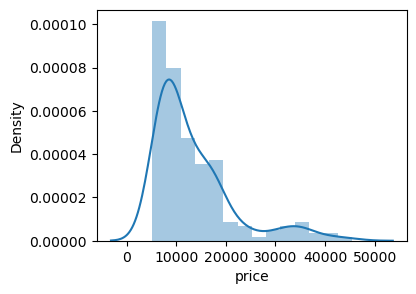

In [29]:
plt.figure(figsize=(4,3))
sns.distplot(df['price'])
plt.show()

We can observe that there is some skewness in the target column (i.e.,price)
The target column highly skewed to the right 

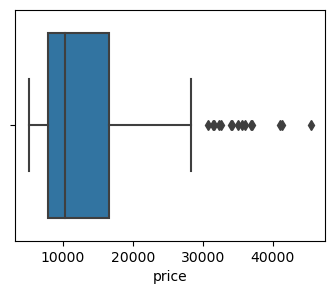

In [30]:
plt.figure(figsize=(4,3))
sns.boxplot(df['price'])
plt.show()

*According to the boxplot ,we can observe that there is an outliers present in the target column*

*The median value is nearly 10000* 

*We can see that the outliers values are abve 30000*


In [31]:
df['price']=np.log(df['price'])

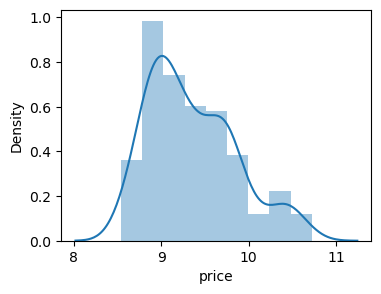

In [32]:
plt.figure(figsize=(4,3))
sns.distplot(df['price'])
plt.show()

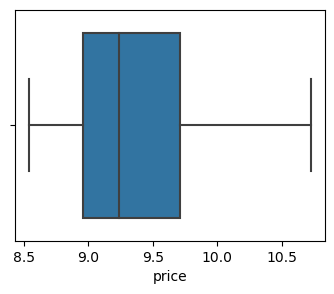

In [33]:
plt.figure(figsize=(4,3))
sns.boxplot(df['price'])
plt.show()

After performing log transformation to the target column there is no outliers in the target column

### Univariate Analysis

#### To get the numerical columns separately

In [34]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

*There are 15 numerical columns*

#### To get categorical columns separately

In [35]:
df_cat = df.select_dtypes(include=object)
df_cat.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName'],
      dtype='object')

There are 10 categorical columns

#### Univariate analysis- Histogram plot for numerical columns

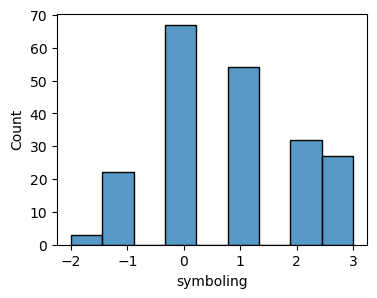

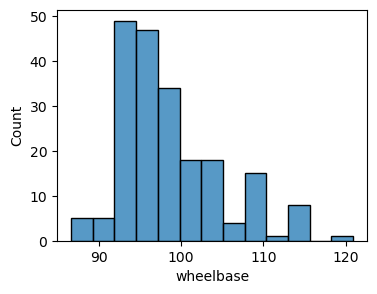

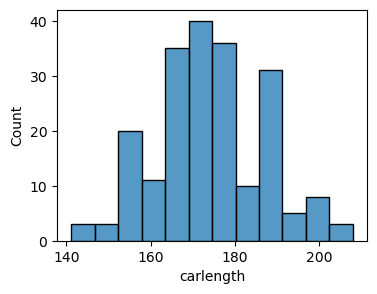

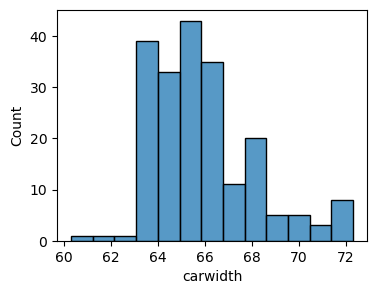

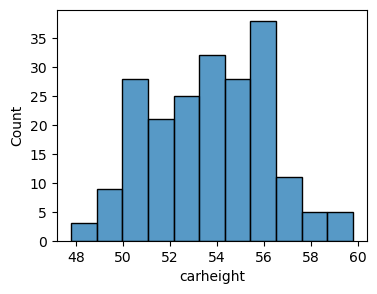

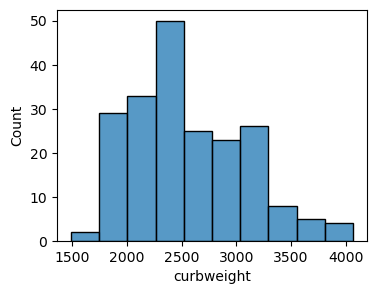

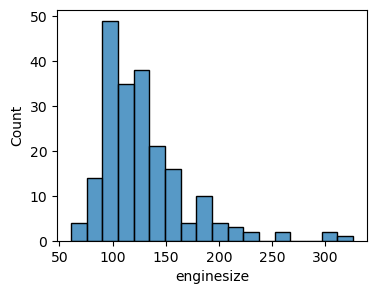

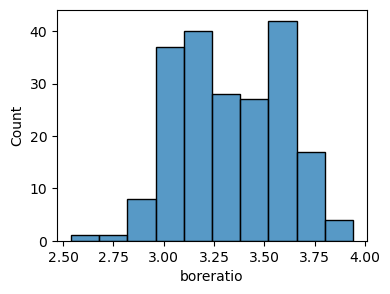

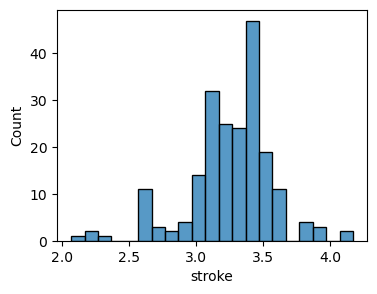

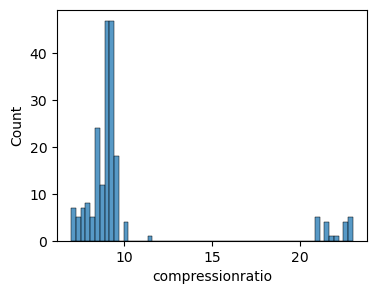

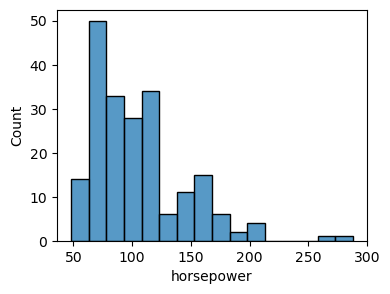

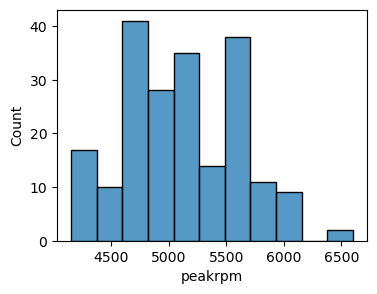

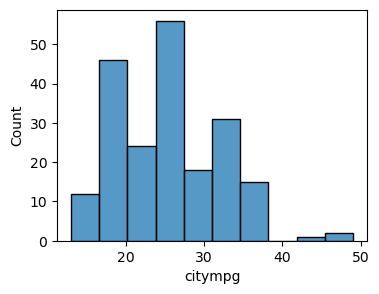

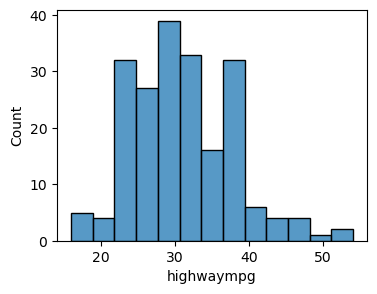

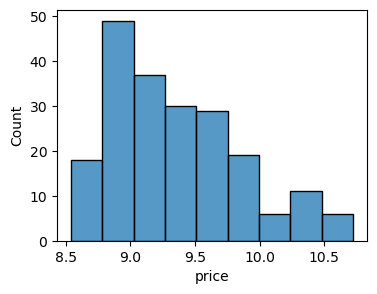

In [36]:
# Using for loop to get histogram plot for numerical columns
for var in df_numeric.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(df[var])
plt.show()

#### Univariate analysis - Boxplot for the numerical columns

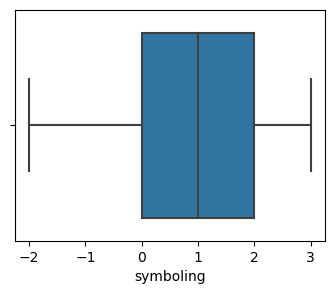

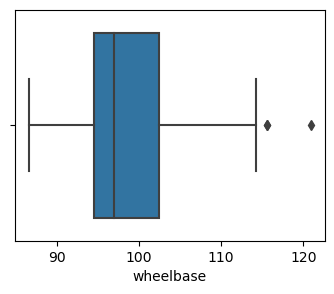

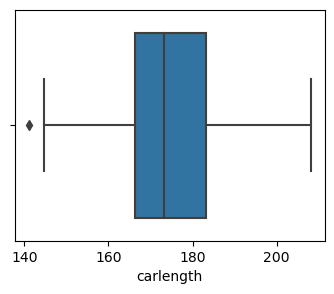

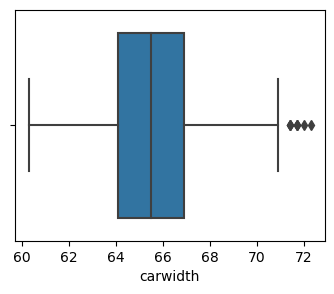

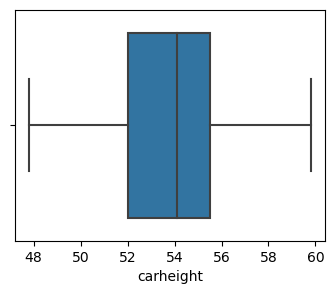

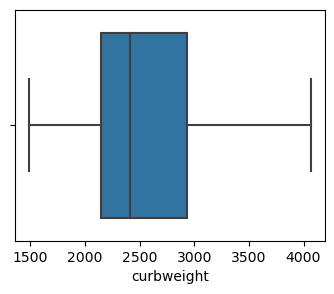

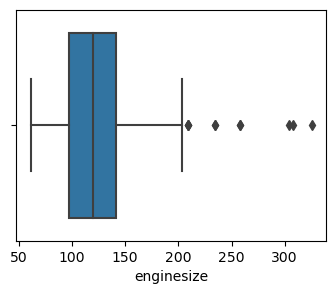

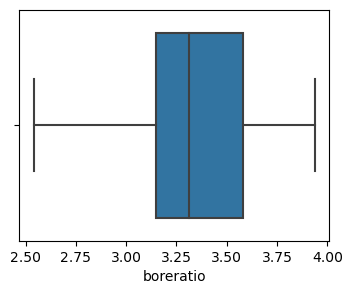

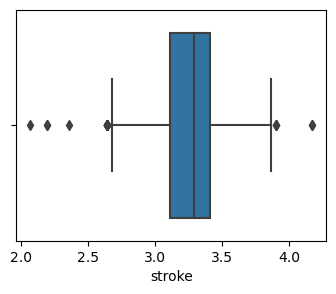

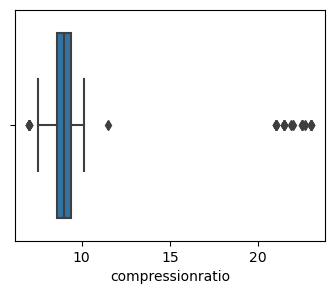

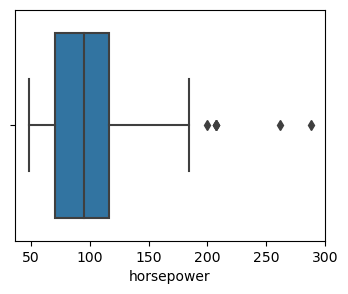

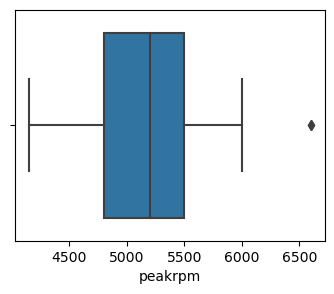

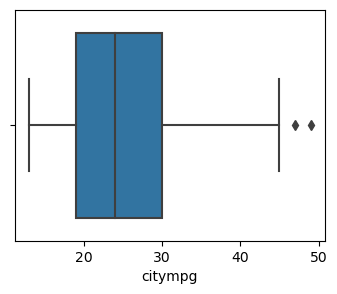

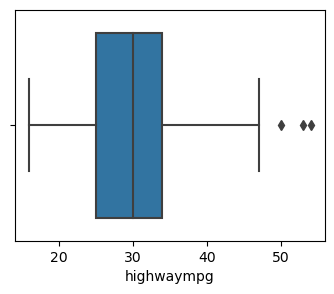

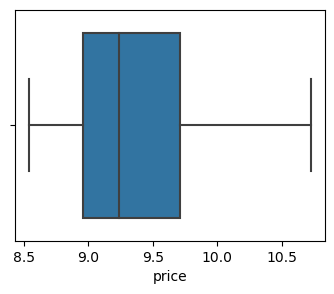

In [37]:
for var in df_numeric.columns:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[var])
plt.show()    

We can see that there are some outliers in the dataset

That columns are wheelbase,carlength,carwidth,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,

### To remove the outliers in the numerical variables using IQR method

In [17]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_numeric = ['wheelbase','carlength','carwidth',
                    'enginesize','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

for col in col_numeric: 
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound  = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df = df.loc[(df[col] > lower_bound) & (df[col] < upper_bound)]

df.shape

(123, 25)

*The records reduces from 205 to 123*

#### Univariate analysis - Count plot for categorical variables

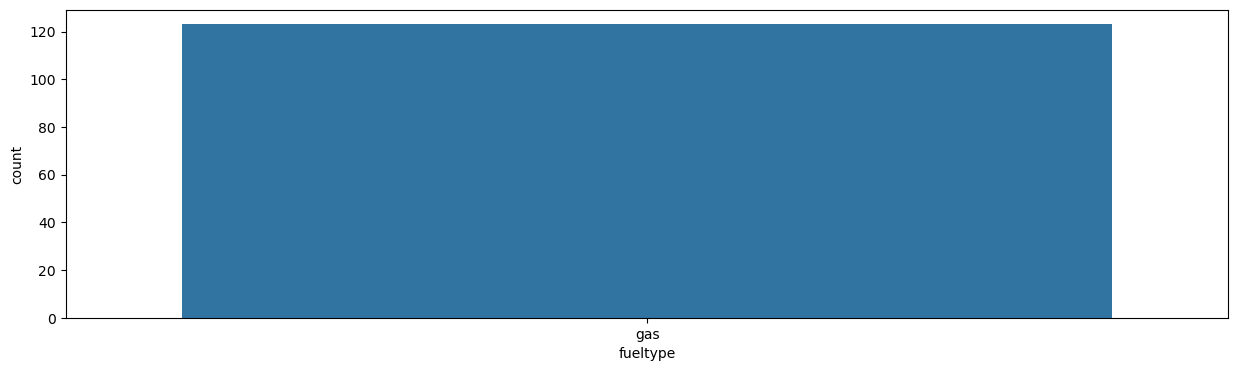

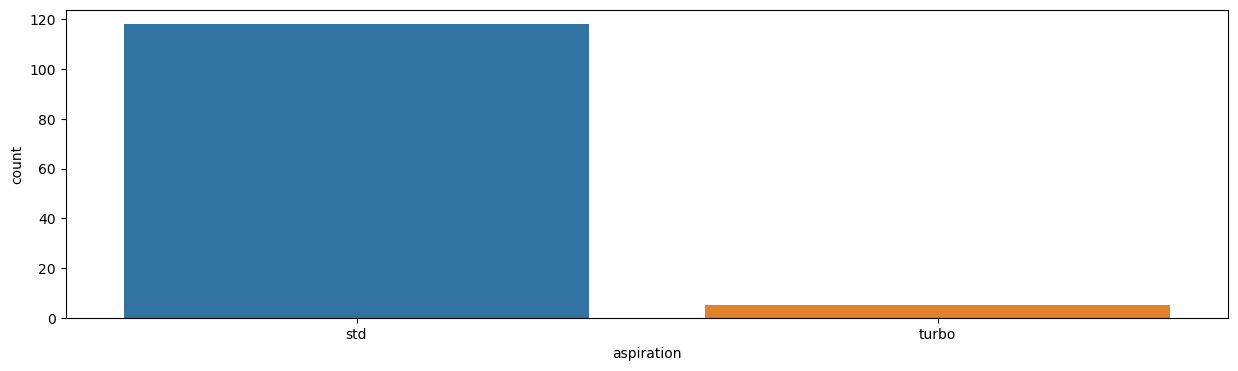

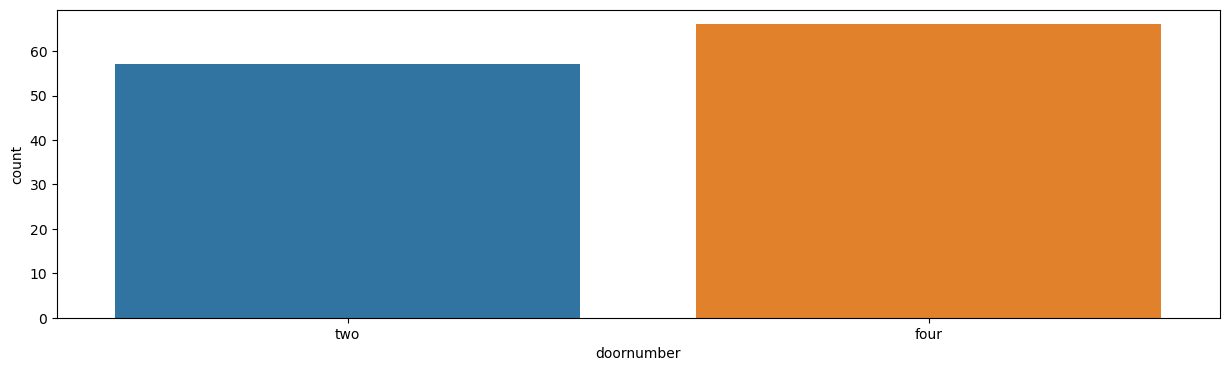

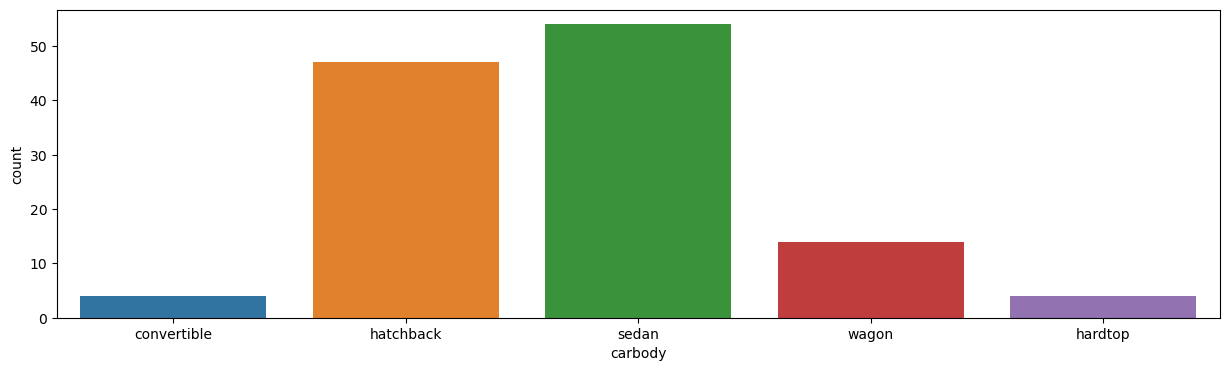

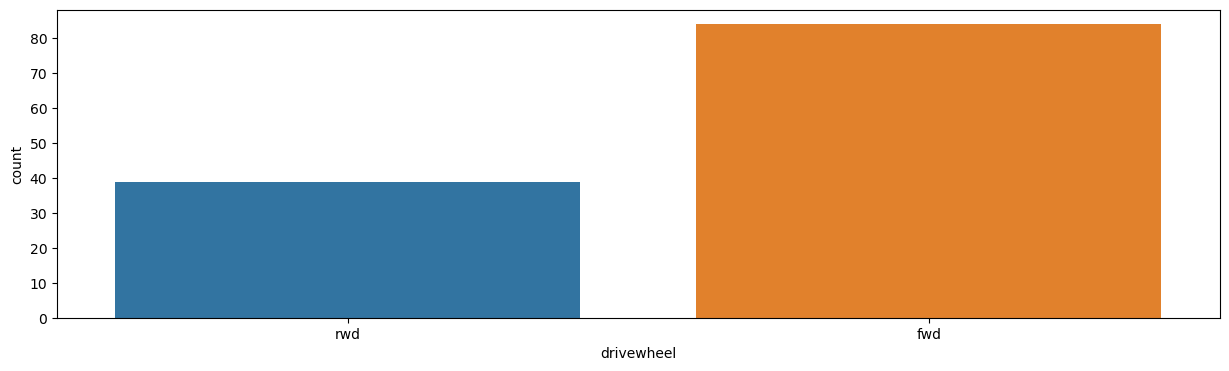

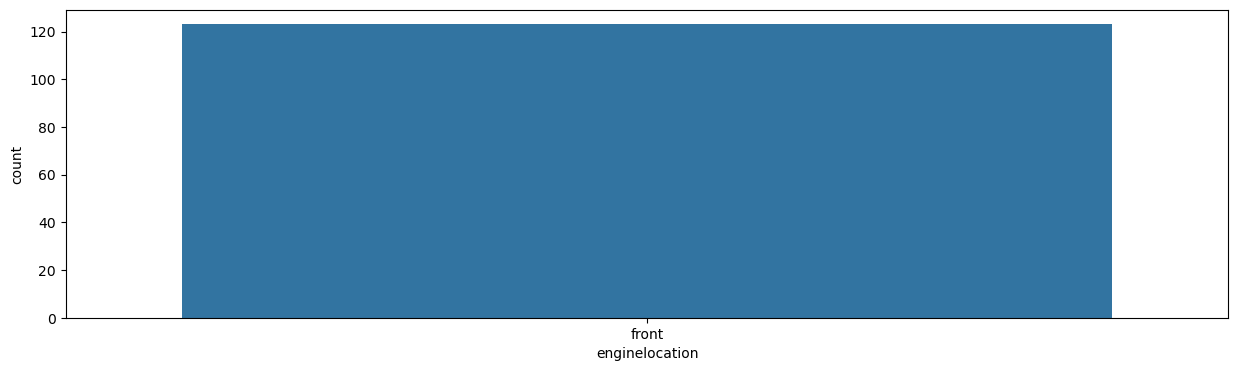

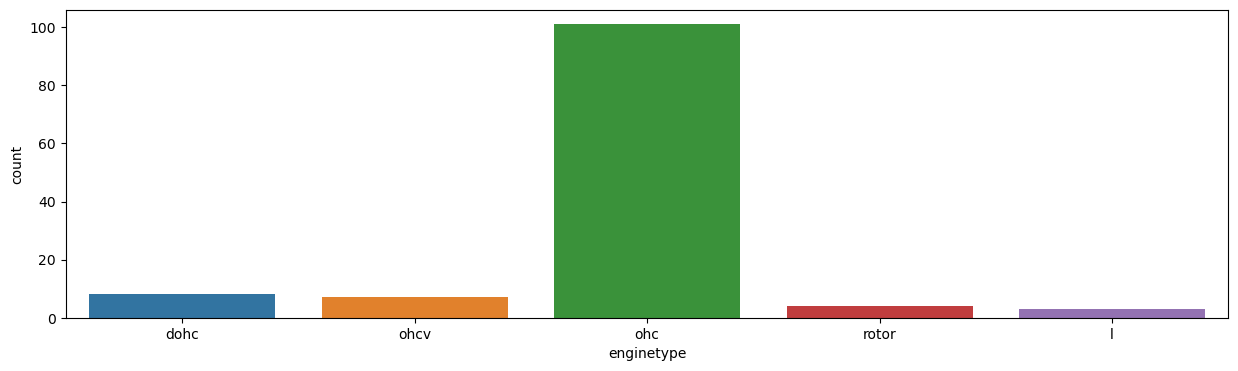

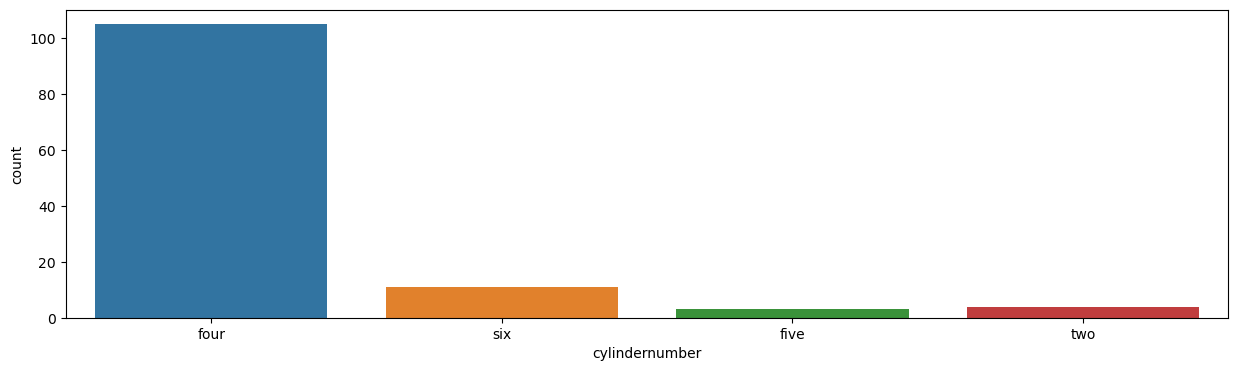

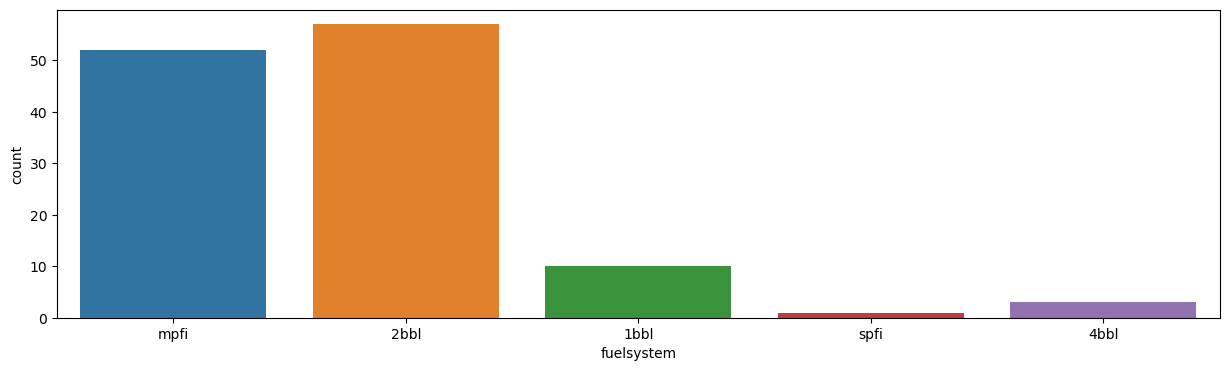

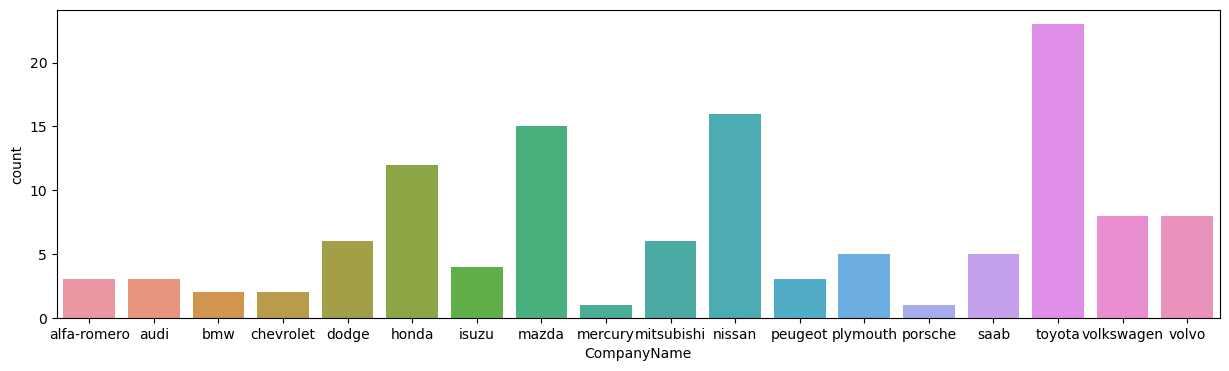

In [139]:
for var in df_cat.columns:
    plt.figure(figsize=(15,4))
    sns.countplot(df[var])
plt.show()        

### Bivariate Analysis

#### Bivariate analysis - Count plot for categorical columns and target variable

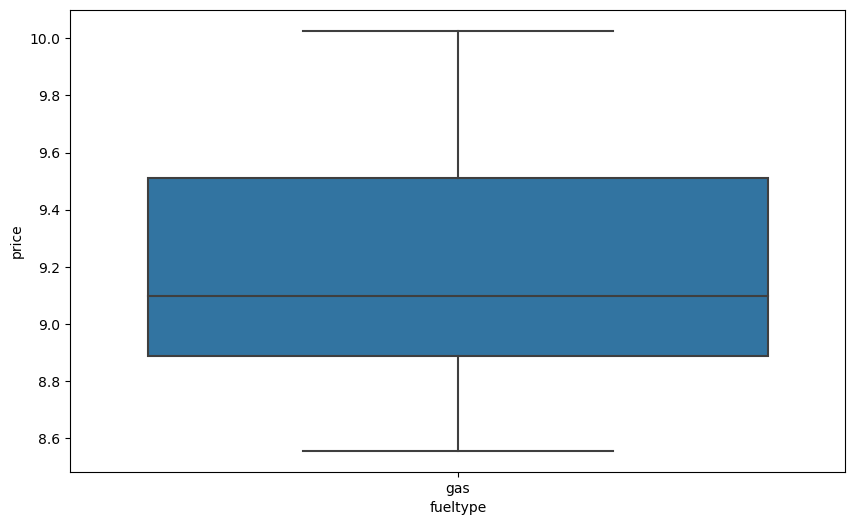

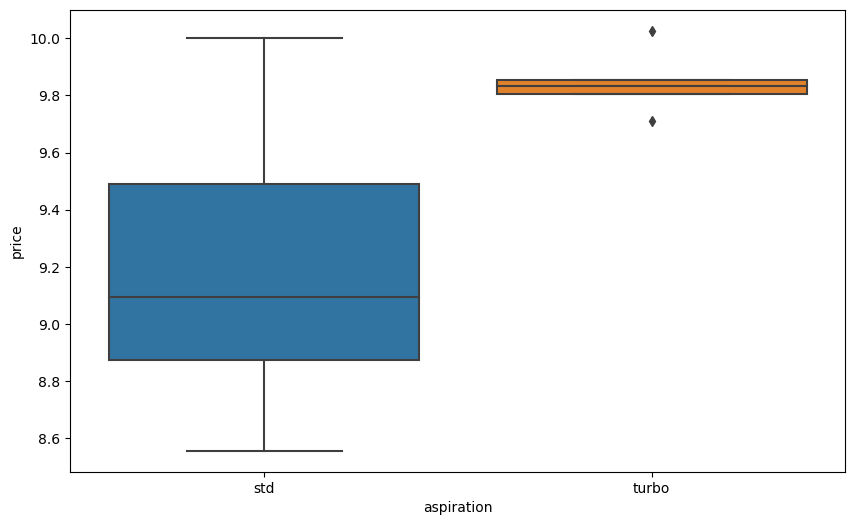

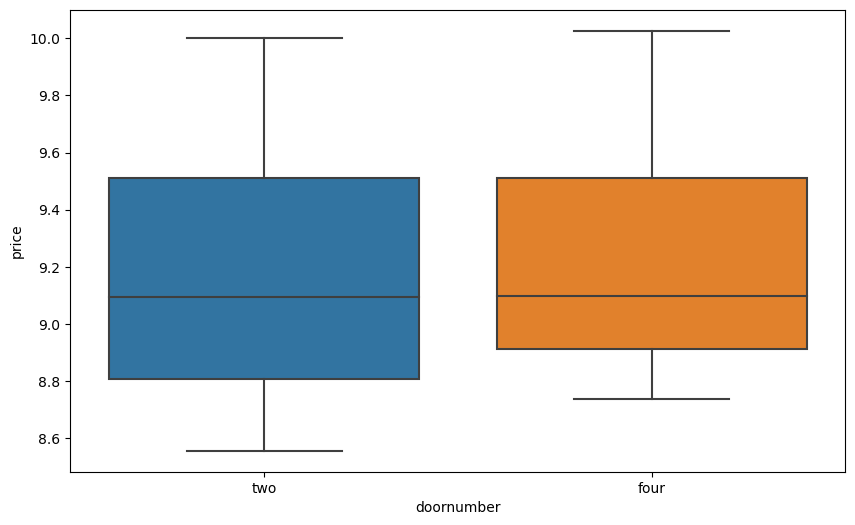

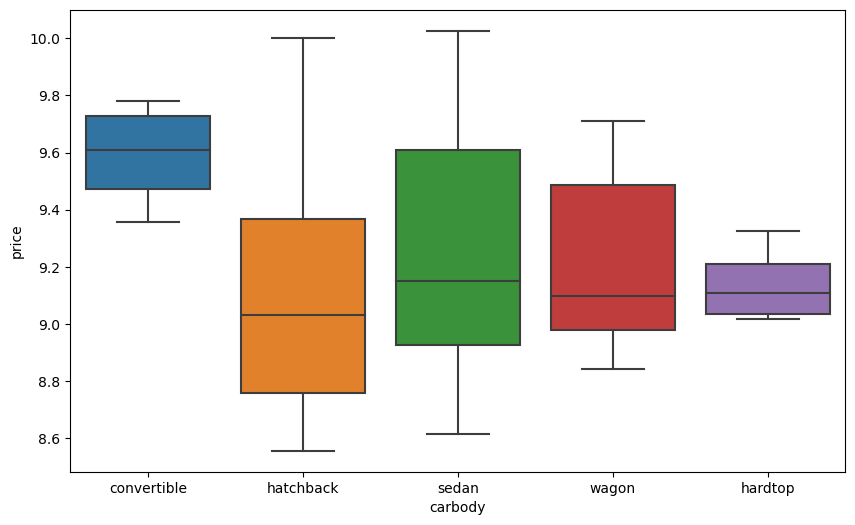

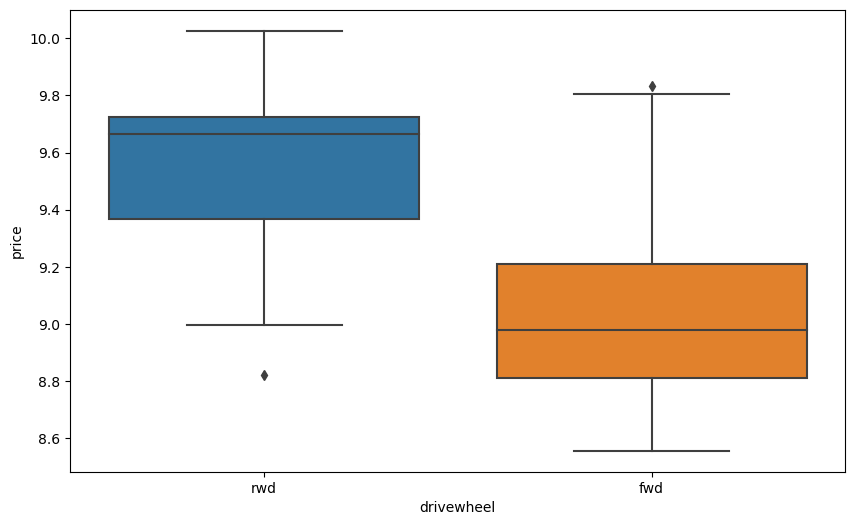

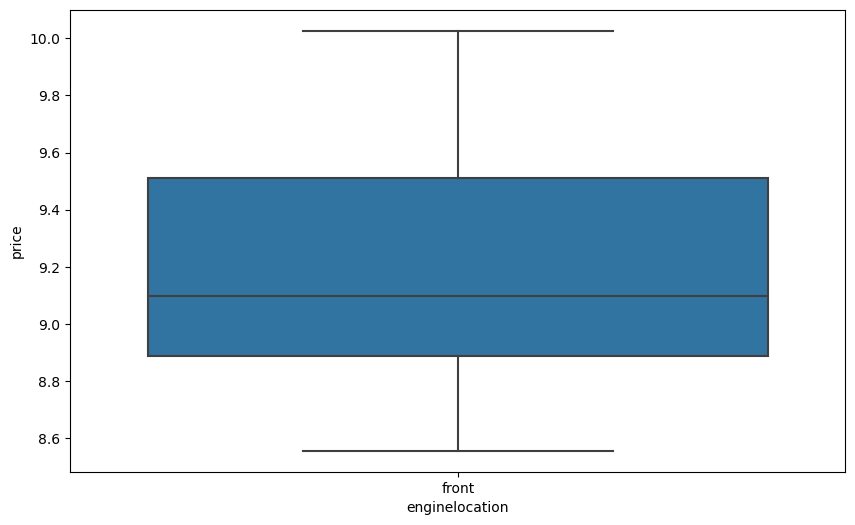

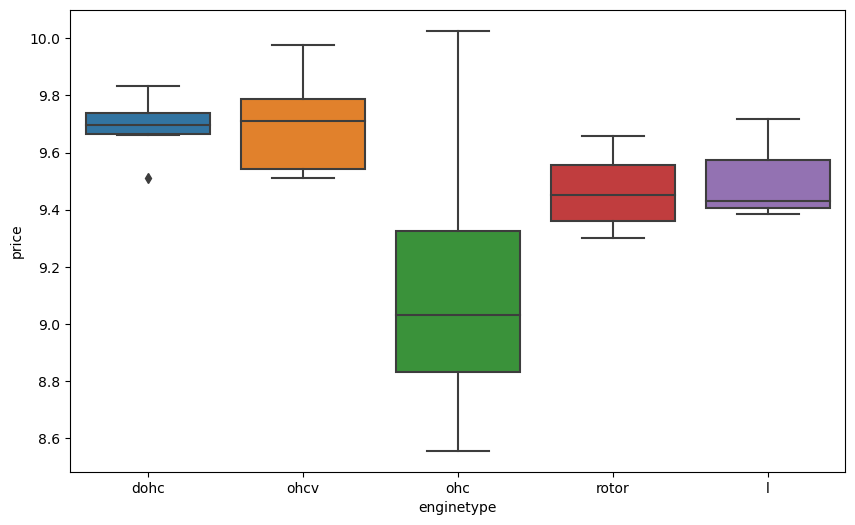

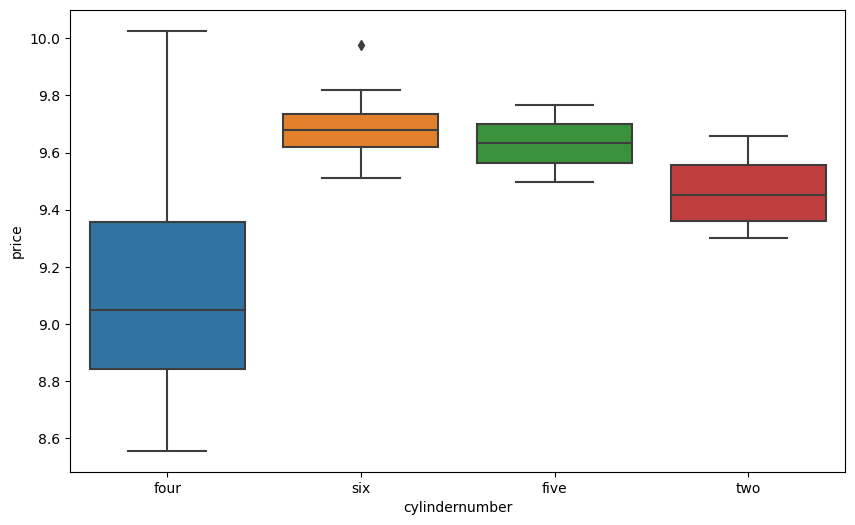

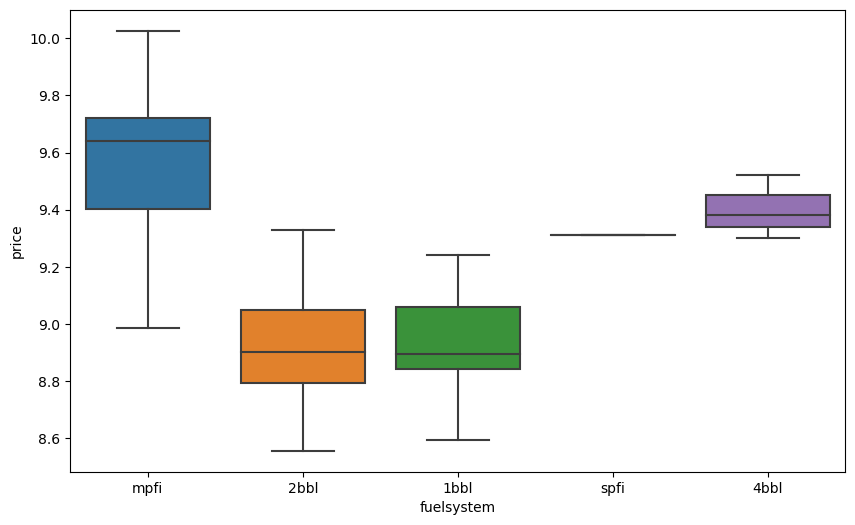

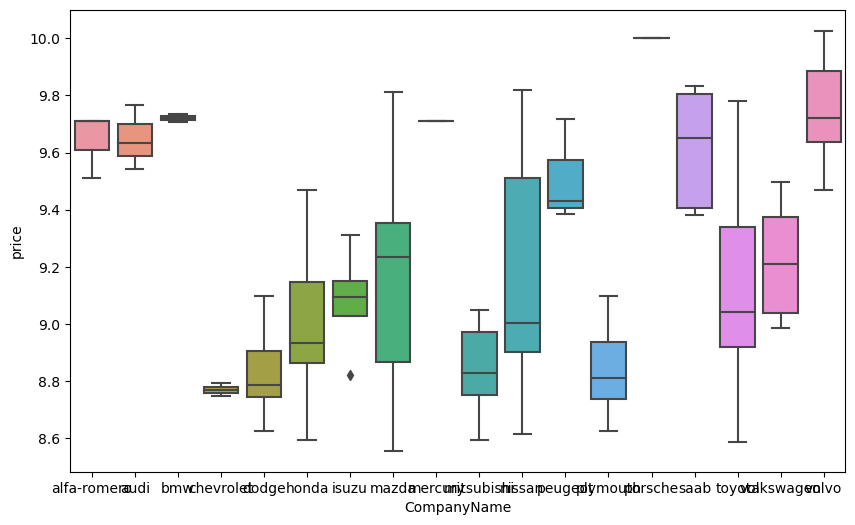

In [140]:
for var in df_cat.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(df[var],'price',data=df)
plt.show()

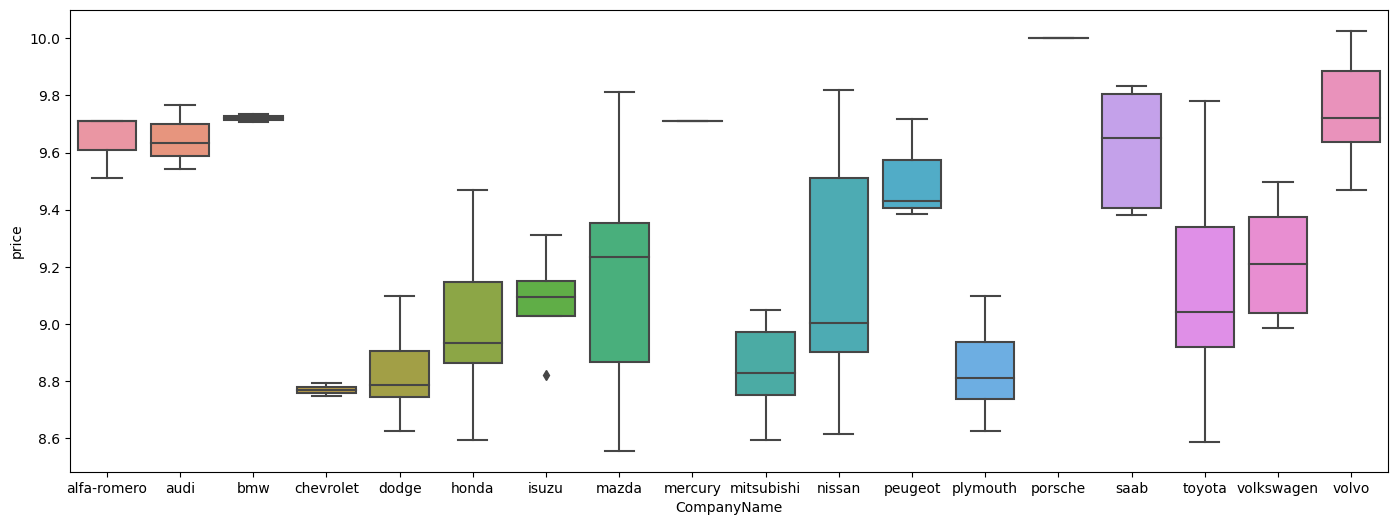

In [141]:
plt.figure(figsize=(17,6))
sns.boxplot('CompanyName','price',data=df)
plt.show()

### Multivariate analysis

#### Multivariate analysis - Pair plot

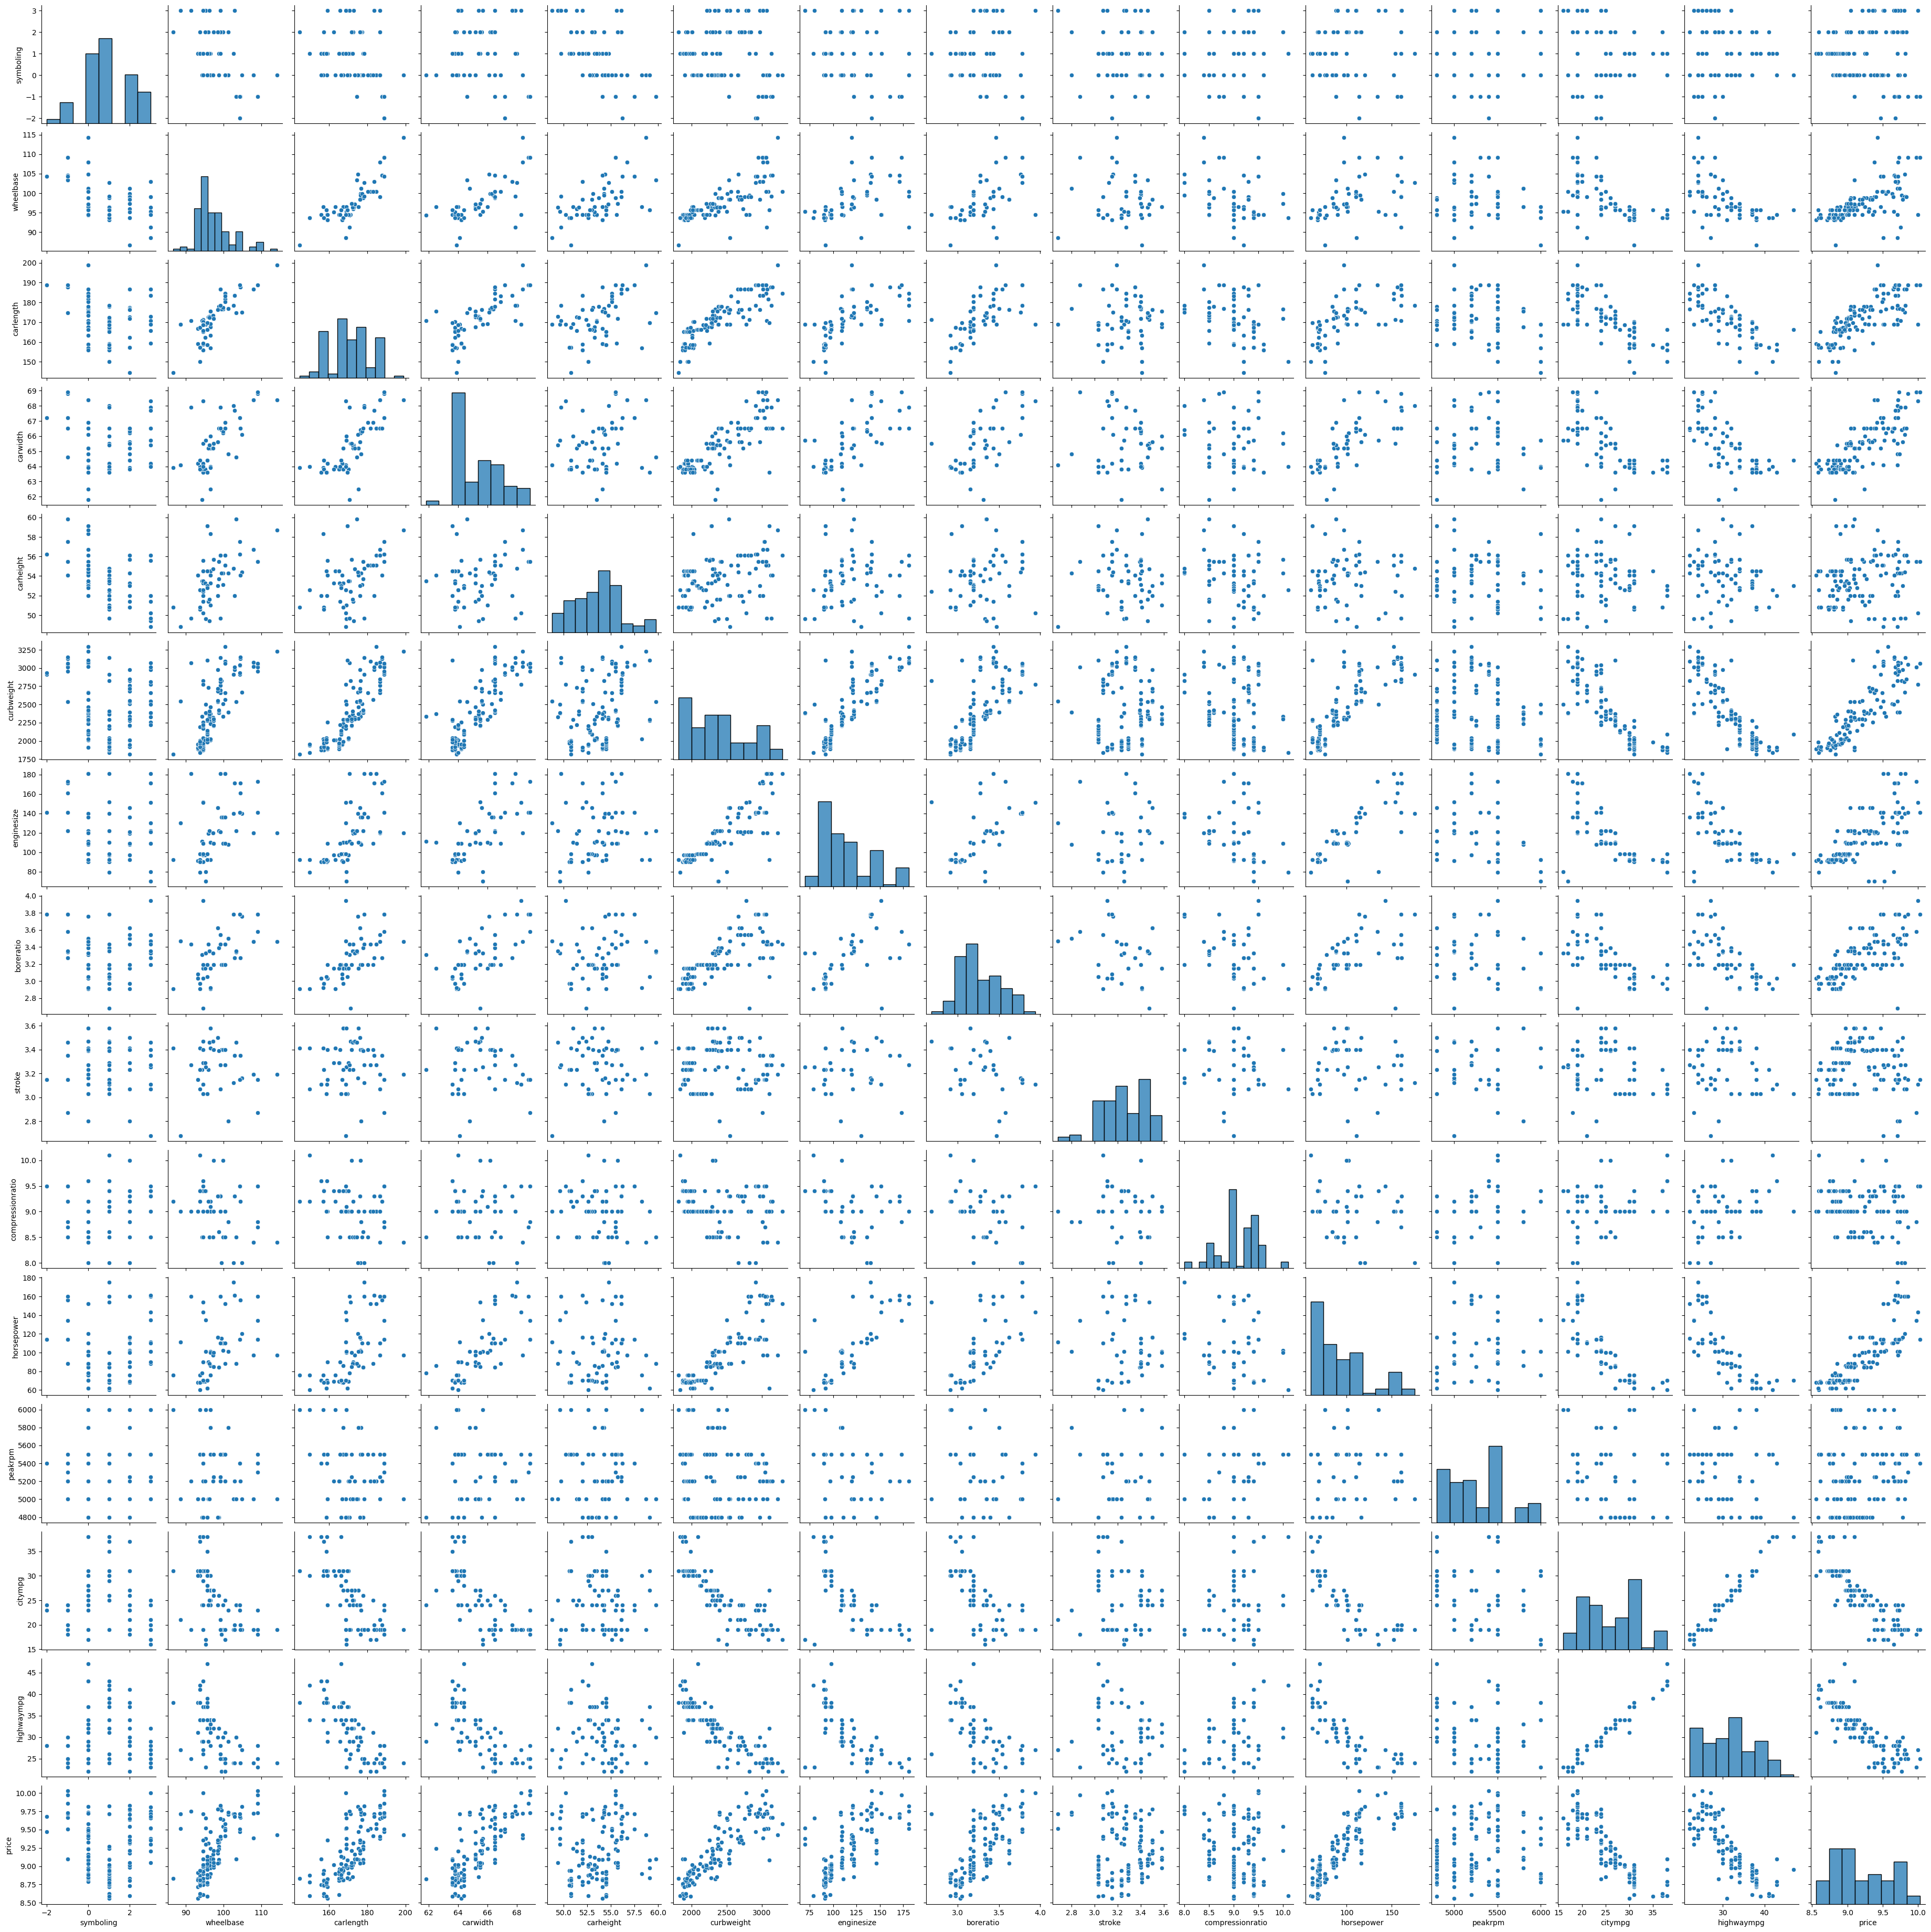

In [102]:
sns.pairplot(df)
plt.show()

*We can see that there is some linear relationship among the variables.*

#### Multivariate analysis - To check the correlation using heatmap

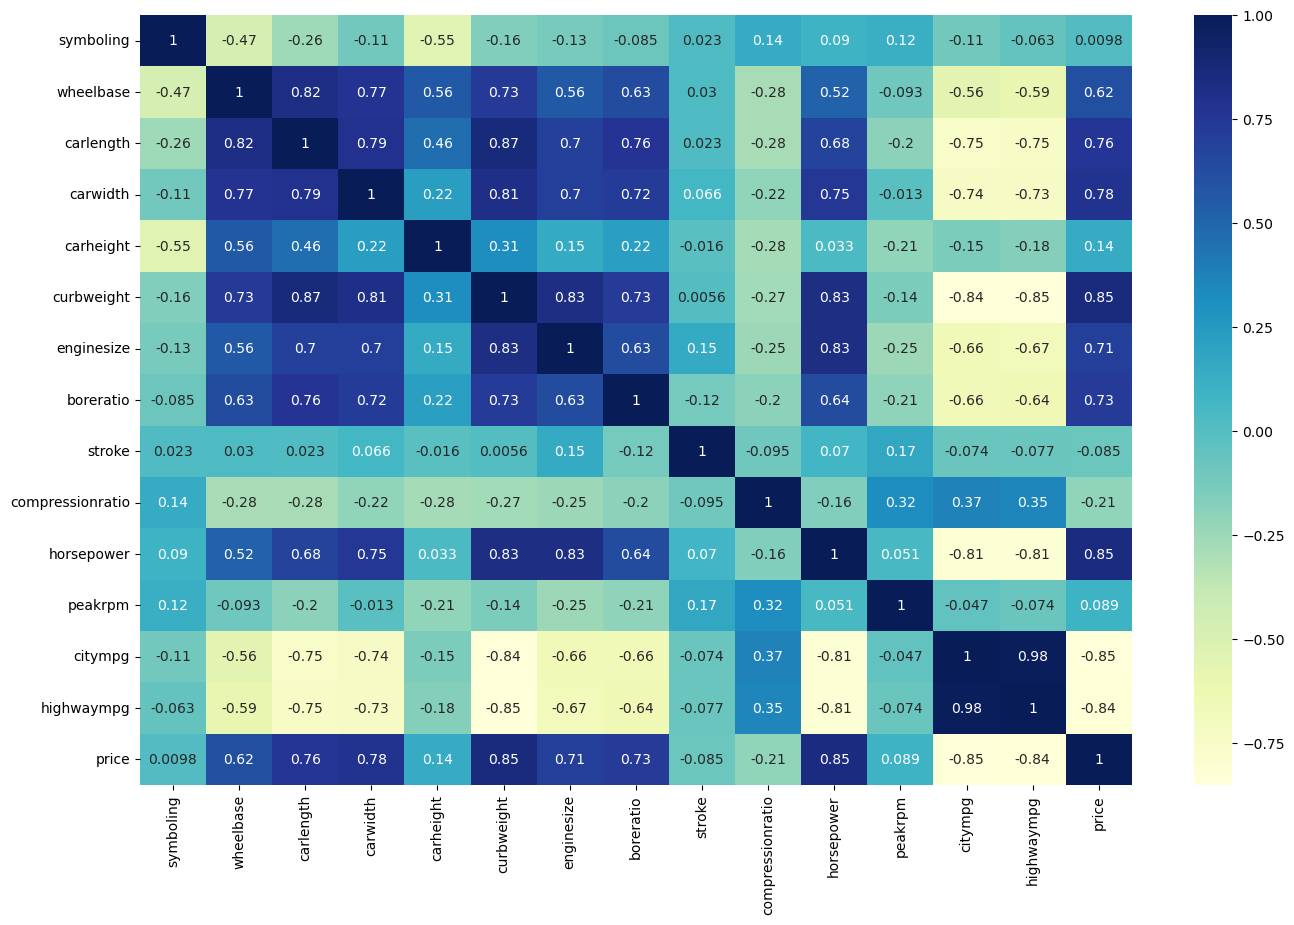

In [32]:
plt.figure(figsize = (16, 10))
cor=df.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

**Observations:**

*1 .We can see that there’s a high correlation of price with ‘curbweight’, ‘carwidth’, ‘carlength’, ‘wheelbase’, ‘enginesize’ and ‘horsepower’.*

*2 . curbweight ,carwidth and carlength columns are highly correlated with wheelbase* 

*3 . carwidth,curbweight columns are highly correlated with carlength*

*4 . carwidth column highly correlated with price, enginesize ,curbweight,carlength and wheelbase*

*5 . curbweight column highly correlated with price,horsepower,enginesize,carwidth,carlength and wheelbase*

*6 . price column highly correlated with horsepower,stroke,enginesize,curbweight,carwidth*

*7 . price column negatively correlated with highwaympg and citympg*

### To create dummy variables for the categorical columns

In [142]:
df_cat.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'CompanyName'],
      dtype='object')

In [18]:
df['fueltype'].value_counts()

gas    123
Name: fueltype, dtype: int64

In [19]:
df['fueltype']=df['fueltype'].map({'gas':1})
df.rename(columns={'fueltype':'fueltype_gas'})

,symboling,fueltype_gas,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero
1,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero
2,1,1,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero
3,2,1,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi
4,2,1,std,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,1,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,9.712024,volvo
200,-1,1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,9.731809,volvo
201,-1,1,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,9.854560,volvo
202,-1,1,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,9.975110,volvo


In [20]:
df['aspiration'].value_counts()

std      118
turbo      5
Name: aspiration, dtype: int64

In [21]:
df['aspiration'] = df['aspiration'].map({'std': 1, 'turbo': 0})

In [23]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero
1,3,1,1,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero
2,1,1,1,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero
3,2,1,1,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi
4,2,1,1,four,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi


In [24]:
df['doornumber'].value_counts()

four    66
two     57
Name: doornumber, dtype: int64

In [25]:
df['doornumber']=df['doornumber'].map({'two':2,'four':4})

In [26]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero
1,3,1,1,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero
2,1,1,1,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero
3,2,1,1,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi
4,2,1,1,4,sedan,fwd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi


In [27]:
df['drivewheel'].value_counts()

fwd    84
rwd    39
Name: drivewheel, dtype: int64

In [28]:
df['drivewheel']=df['drivewheel'].map({'fwd':0,'rwd':1})

In [29]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,2,convertible,1,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero
1,3,1,1,2,convertible,1,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero
2,1,1,1,2,hatchback,1,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero
3,2,1,1,4,sedan,0,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi
4,2,1,1,4,sedan,0,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi


In [30]:
df['enginelocation'].value_counts()

front    123
Name: enginelocation, dtype: int64

In [31]:
df['enginelocation']=df['enginelocation'].map({'front':0})

In [32]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero
1,3,1,1,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero
2,1,1,1,2,hatchback,1,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero
3,2,1,1,4,sedan,0,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi
4,2,1,1,4,sedan,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi


In [33]:
df.rename(columns={'enginelocation':'enginelocation_front'})

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation_front,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero
1,3,1,1,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero
2,1,1,1,2,hatchback,1,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero
3,2,1,1,4,sedan,0,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi
4,2,1,1,4,sedan,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,-1,1,1,4,wagon,1,0,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,9.712024,volvo
200,-1,1,1,4,sedan,1,0,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,9.731809,volvo
201,-1,1,0,4,sedan,1,0,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,9.854560,volvo
202,-1,1,1,4,sedan,1,0,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,9.975110,volvo


In [34]:
df['cylindernumber'].value_counts()

four    105
six      11
two       4
five      3
Name: cylindernumber, dtype: int64

In [35]:
df['cylindernumber']=df['cylindernumber'].map({'four':4,'six':6,'two':2,'five':5,'eight':8,'three':3,'twelve':12})

In [36]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,1,1,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero
1,3,1,1,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero
2,1,1,1,2,hatchback,1,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero
3,2,1,1,4,sedan,0,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi
4,2,1,1,4,sedan,0,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi


In [37]:
df[ 'carbody'].value_counts()

sedan          54
hatchback      47
wagon          14
convertible     4
hardtop         4
Name: carbody, dtype: int64

In [38]:
carbody_dummies = pd.get_dummies(df['carbody'],drop_first=True)
carbody_dummies.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [39]:
df = pd.concat([df,carbody_dummies], axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon
0,3,1,1,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero,0,0,0,0
1,3,1,1,2,convertible,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero,0,0,0,0
2,1,1,1,2,hatchback,1,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero,0,1,0,0
3,2,1,1,4,sedan,0,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi,0,0,1,0
4,2,1,1,4,sedan,0,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi,0,0,1,0


In [40]:
#  df['carbody']= df['carbody'].map({'sedan':0,'hatchback':1,'wagon':2,'convertible':3,'hardtop':4})

In [41]:
carbody_dummies = carbody_dummies.rename(columns={'hardtop':'carbody(hardtop)', 'hatchback':'carbody(hatchback)',
                                                'sedan':'carbody(sedan)','wagon':'carbody(wagon)'})
carbody_dummies.head()

,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [42]:
df = df.drop('carbody',axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon
0,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero,0,0,0,0
1,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero,0,0,0,0
2,1,1,1,2,1,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero,0,1,0,0
3,2,1,1,4,0,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi,0,0,1,0
4,2,1,1,4,0,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi,0,0,1,0


In [43]:
df= pd.concat([df,carbody_dummies], axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon)
0,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero,0,0,0,0,0,0,0,0
1,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero,0,0,0,0,0,0,0,0
2,1,1,1,2,1,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero,0,1,0,0,0,1,0,0
3,2,1,1,4,0,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi,0,0,1,0,0,0,1,0
4,2,1,1,4,0,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi,0,0,1,0,0,0,1,0


In [44]:
df['enginetype'].value_counts()

ohc      101
dohc       8
ohcv       7
rotor      4
l          3
Name: enginetype, dtype: int64

In [45]:
# df['enginetype']=df['enginetype'].map({'ohc':0,'ohcf':1,'ohcv':2,'dohc':3,'l':4,'rotor':5,'dohcv':6})

In [46]:
enginetype_dummies = pd.get_dummies(df['enginetype'],drop_first=True)
enginetype_dummies.head()

,l,ohc,ohcv,rotor
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [47]:
enginetype_dummies = enginetype_dummies.rename(columns={'l':'enginetype(l)','dohcv':'enginetype(dohcv)','ohc':'enginetype(ohc)',
                                                      
                                                      'ohcf':'enginetype(ohcf)','ohcv':'enginetype(ohcv)' ,
                                                      'rotor':'enginetype(rotor)'})
enginetype_dummies.head()

,enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,0,0,0,0
1,0,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [48]:
df = pd.concat([df,enginetype_dummies], axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0
3,2,1,1,4,0,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi,0,0,1,0,0,0,1,0,0,1,0,0
4,2,1,1,4,0,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi,0,0,1,0,0,0,1,0,0,1,0,0


In [49]:
df = df.drop('enginetype',axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor)
0,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,0,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0
3,2,1,1,4,0,0,99.8,176.6,66.2,54.3,2337,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi,0,0,1,0,0,0,1,0,0,1,0,0
4,2,1,1,4,0,0,99.4,176.6,66.4,54.3,2824,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi,0,0,1,0,0,0,1,0,0,1,0,0


In [50]:
df['fuelsystem'].value_counts()

2bbl    57
mpfi    52
1bbl    10
4bbl     3
spfi     1
Name: fuelsystem, dtype: int64

In [51]:
fuelsystem_dummies = pd.get_dummies(df['fuelsystem'], drop_first=True)
fuelsystem_dummies.head()

,2bbl,4bbl,mpfi,spfi
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [52]:
# df['fuelsystem']=df['fuelsystem'].map({'mpfi':0,'2bbl':1,'idi':2,'1bbl':3,'spdi':4,'4bbl':5,'mfi':6,'spfi':7})

In [53]:
fuelsystem_dummies= fuelsystem_dummies.rename(columns={'2bbl':'fuelsystem(2bbl)', '4bbl':'fuelsystem(4bbl)', 'idi':'fuelsystem(idi)', 
                                                      'mfi':'fuelsystem(mfi)','mpfi':'fuelsystem(mpfi)' ,'spdi':'fuelsystem(spdi)',
                                                             'spfi':'fuelsystem(spfi)'})
fuelsystem_dummies.head()

,fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [54]:
df = pd.concat([df,fuelsystem_dummies], axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,1,2,1,0,94.5,171.2,65.5,52.4,2823,6,152,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,2,1,1,4,0,0,99.8,176.6,66.2,54.3,2337,4,109,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,2,1,1,4,0,0,99.4,176.6,66.4,54.3,2824,5,136,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [55]:
df= df.drop('fuelsystem',axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi)
0,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1,1,2,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,2,1,1,4,0,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,9.543235,audi,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,2,1,1,4,0,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,9.767095,audi,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0


In [56]:
df['CompanyName'].value_counts()

toyota         23
nissan         16
mazda          15
honda          12
volvo           8
volkswagen      8
mitsubishi      6
dodge           6
plymouth        5
saab            5
isuzu           4
audi            3
peugeot         3
alfa-romero     3
chevrolet       2
bmw             2
mercury         1
porsche         1
Name: CompanyName, dtype: int64

In [57]:
#df['CompanyName']=df['CompanyName'].map({'toyota':0,'nissan':1,'mazda':2,'honda':3,'volvo':4,'volkswagen':5,
#                                        'mitsubishi':6,'dodge':7,'plymouth':8,'saab':9,'isuzu':10,'audi':11,
#                                        'peugeot':12,'alfa-romero':13,'chevrolet':14,'bmw':15,'mercury':16,'porsche':17})

In [58]:
CompanyName_dummies = pd.get_dummies(df['CompanyName'], drop_first=True)
CompanyName_dummies.head()

,audi,bmw,chevrolet,dodge,honda,isuzu,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,saab,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
CompanyName_dummies = CompanyName_dummies.rename(columns={'audi':'CarCompany(audi)', 'bmw':'CarCompany(bmw)', 'buick':'CarCompany(buick)', 
                                                      'chevrolet':'CarCompany(chevrolet)','dodge':'CarCompany(dodge)' ,'honda':'CarCompany(honda)',
                                                      'isuzu':'CarCompany(isuzu)','jaguar':'CarCompany(jaguar)','mazda':'CarCompany(mazda)',
                                                      'mercury':'CarCompany(mercury)','mitsubishi':'CarCompany(mitsubishi)','nissan':'CarCompany(nissan)',
                                                      'peugeot':'CarCompany(peugeot)','plymouth':'CarCompany(plymouth)','porsche':'CarCompany(porsche)',
                                                      'renault':'CarCompany(renault)','saab':'CarCompany(saab)','subaru':'CarCompany(subaru)',
                                                      'toyota':'CarCompany(toyota)','volkswagen':'CarCompany(volkswagen)','volvo':'CarCompany(volvo)'})
                                                    
CompanyName_dummies.head()

,CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [60]:
df = pd.concat([df,CompanyName_dummies], axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,hardtop,hatchback,sedan,wagon,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,0,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,9.543235,audi,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,0,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,9.767095,audi,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
df= df.drop('CompanyName',axis=1)
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,9.510075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,1,0,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,9.711116,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,0,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,9.711116,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,0,0,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,9.543235,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,0,0,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,9.767095,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 204
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               123 non-null    int64  
 1   fueltype                123 non-null    int64  
 2   aspiration              123 non-null    int64  
 3   doornumber              123 non-null    int64  
 4   drivewheel              123 non-null    int64  
 5   enginelocation          123 non-null    int64  
 6   wheelbase               123 non-null    float64
 7   carlength               123 non-null    float64
 8   carwidth                123 non-null    float64
 9   carheight               123 non-null    float64
 10  curbweight              123 non-null    int64  
 11  cylindernumber          123 non-null    int64  
 12  enginesize              123 non-null    int64  
 13  boreratio               123 non-null    float64
 14  stroke                  123 non-null    fl

### Scaling the Data

In [66]:
df_numeric_fea = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

In [67]:
xscaler=MinMaxScaler()

# Fit the data in the object
df[df_numeric_fea] = xscaler.fit_transform(df[df_numeric_fea])
df.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,3,1,1,2,1,0,0.072464,0.445672,0.323944,0.000000,0.493568,4,0.540541,0.626984,0.000000,0.476190,0.443478,0.166667,0.227273,0.20,0.648803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,1,0,0.072464,0.445672,0.323944,0.000000,0.493568,4,0.540541,0.626984,0.000000,0.476190,0.443478,0.166667,0.227273,0.20,0.785440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,0,0.286232,0.489871,0.521127,0.327273,0.679756,6,0.738739,0.000000,0.877778,0.476190,0.817391,0.166667,0.136364,0.16,0.785440,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,0,0,0.478261,0.589319,0.619718,0.500000,0.350711,4,0.351351,0.404762,0.800000,0.952381,0.365217,0.583333,0.363636,0.32,0.671341,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,0,0,0.463768,0.589319,0.647887,0.500000,0.680433,5,0.594595,0.404762,0.800000,0.000000,0.478261,0.583333,0.090909,0.00,0.823486,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
X = df.drop('price',axis=1)
y= df['price']

In [69]:
X=sm.add_constant(X)

In [70]:
# 1. Split the data into training and test sets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [71]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(86, 53)
(37, 53)
(86,)
(37,)


In [72]:
# 2. Build model using sm.OLS().fit()
linreg = sm.OLS(y_train,x_train).fit()
# print the summary output
print(linreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     29.37
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           2.05e-20
Time:                        18:47:05   Log-Likelihood:                 142.56
No. Observations:                  86   AIC:                            -195.1
Df Residuals:                      41   BIC:                            -84.67
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
symboling                  0

**Observations:**

This model explains 96.9% of the variation in the dependent variable claim

The Durbin-Watson test statistics is 2.451 and indicates that there is no autocorrelation. 

A Jarque bera probability value of 0.712 indicates that the residuals in linear regression model are normally distributed.

Condition No which is used for check the multicollinearity

If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

### Model Performance - 1

#### Let us do some predictions using the train and test dataset.

In [73]:
# predict the output of the target variable from the train data 
train_pred = linreg.predict(x_train)

# predict the output of the target variable from the test data
test_pred = linreg.predict(x_test)

In [75]:
# calculate the MSE using the "mean_squared_error" function
# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train, train_pred),4)
# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)
# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test, test_pred),4)
# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.0021
Mean Squared Error (MSE) on test set:  0.0349


In [76]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.0461
Root Mean Squared Error (RMSE) on test set:  0.1868


### Variance Inflation Factor (VIF) -To check multicollinearity

In [77]:
# filter the numerical features in the dataset
df_numeric_features_vif = df.select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,hardtop,hatchback,sedan,wagon,carbody(hardtop),carbody(hatchback),carbody(sedan),carbody(wagon),enginetype(l),enginetype(ohc),enginetype(ohcv),enginetype(rotor),fuelsystem(2bbl),fuelsystem(4bbl),fuelsystem(mpfi),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,3,1,1,2,1,0,0.072464,0.445672,0.323944,0.000000,0.493568,4,0.540541,0.626984,0.000000,0.476190,0.443478,0.166667,0.227273,0.20,0.648803,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,1,2,1,0,0.072464,0.445672,0.323944,0.000000,0.493568,4,0.540541,0.626984,0.000000,0.476190,0.443478,0.166667,0.227273,0.20,0.785440,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,1,0,0.286232,0.489871,0.521127,0.327273,0.679756,6,0.738739,0.000000,0.877778,0.476190,0.817391,0.166667,0.136364,0.16,0.785440,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1,1,4,0,0,0.478261,0.589319,0.619718,0.500000,0.350711,4,0.351351,0.404762,0.800000,0.952381,0.365217,0.583333,0.363636,0.32,0.671341,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,1,1,4,0,0,0.463768,0.589319,0.647887,0.500000,0.680433,5,0.594595,0.404762,0.800000,0.000000,0.478261,0.583333,0.090909,0.00,0.823486,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Calculate the VIF for each numeric variable.**

In [78]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,inf,carbody(sedan)
1,inf,hardtop
2,inf,CarCompany(peugeot)
3,inf,enginetype(l)
4,inf,carbody(wagon)
5,inf,carbody(hatchback)
6,inf,carbody(hardtop)
7,inf,wagon
8,inf,sedan
9,inf,hatchback


In [79]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'
# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    # create an empty dataframe
    vif = pd.DataFrame()
    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]
    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns
    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                Features
0     5.362528               symboling
1     4.707413              drivewheel
2          NaN          enginelocation
3     1.343310                 hardtop
4     2.913732               hatchback
5     1.420595                   wagon
6     1.530077        enginetype(ohcv)
7     4.791312       enginetype(rotor)
8     4.000000        fuelsystem(4bbl)
9     1.422334        fuelsystem(spfi)
10    1.225791        CarCompany(audi)
11    1.195825         CarCompany(bmw)
12    1.026989   CarCompany(chevrolet)
13    1.131137       CarCompany(dodge)
14    1.192234       CarCompany(honda)
15    1.376850       CarCompany(isuzu)
16    1.607194       CarCompany(mazda)
17    1.151139     CarCompany(mercury)
18    1.348009  CarCompany(mitsubishi)
19    1.617102      CarCompany(nissan)
20    1.391343     CarCompany(peugeot)
21    1.092488    CarCompany(plymouth)
22    1.164791     CarCompany(porsche)
23    1.462703        CarCompany(saab)
24    2.039126      CarCo

In [80]:
# display the first 5 observations
df_numeric_features_vif.head()

,symboling,drivewheel,enginelocation,hardtop,hatchback,wagon,enginetype(ohcv),enginetype(rotor),fuelsystem(4bbl),fuelsystem(spfi),CarCompany(audi),CarCompany(bmw),CarCompany(chevrolet),CarCompany(dodge),CarCompany(honda),CarCompany(isuzu),CarCompany(mazda),CarCompany(mercury),CarCompany(mitsubishi),CarCompany(nissan),CarCompany(peugeot),CarCompany(plymouth),CarCompany(porsche),CarCompany(saab),CarCompany(toyota),CarCompany(volkswagen),CarCompany(volvo)
0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


we can conclude that there is no multicollinearity in the data.
We will use the above dataframe "df_numeric_features_vif" to build the MLR model with significant variables.

In [81]:
X=df_numeric_features_vif
y=df['price']
X=sm.add_constant(X)

In [82]:
x_train_sig,x_test_sig,y_train_sig,y_test_sig = train_test_split(X,y,test_size=0.3,random_state=1)

In [83]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train_sig, x_train_sig).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     10.01
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           2.66e-13
Time:                        18:50:00   Log-Likelihood:                 62.395
No. Observations:                  86   AIC:                            -76.79
Df Residuals:                      62   BIC:                            -17.89
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**Observations:**

This model explains 78.8% of the variation in the dependent variable claim

The Durbin-Watson test statistics is 1.729 and indicates that there is no autocorrelation. 

A Jarque bera probability value of 0.219 indicates that the residuals in linear regression model are normally distributed.

Condition No which is used for check the multicollinearity

If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

### To create scatter plot for residuals and each independent variable

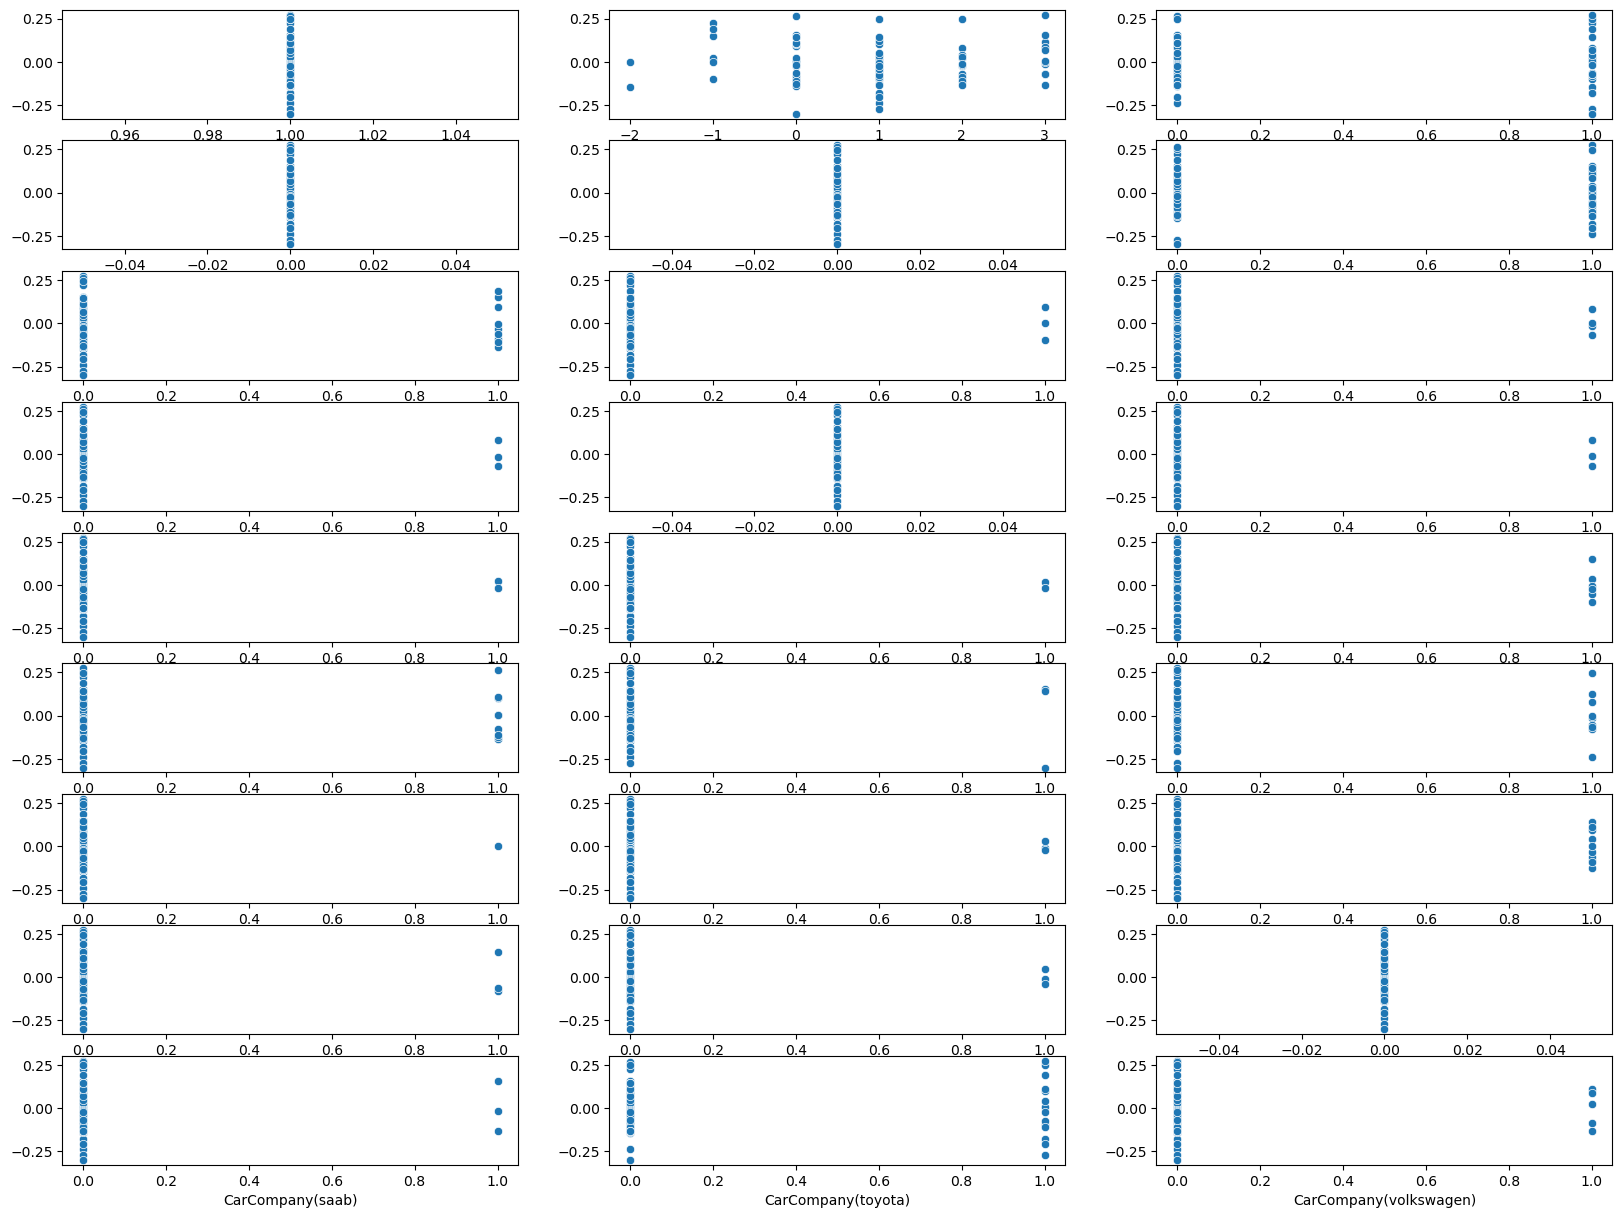

In [94]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 9, ncols= 3, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(x_train_sig.columns, ax.flatten()):
    sns.scatterplot(x_train_sig[variable], MLR_full_model.resid , ax=subplot)

# display the plot
plt.show()

**Interpretation:**

* The above plots show no specific pattern, implies that there is a linearity present in the data.

### Q-Q Plot

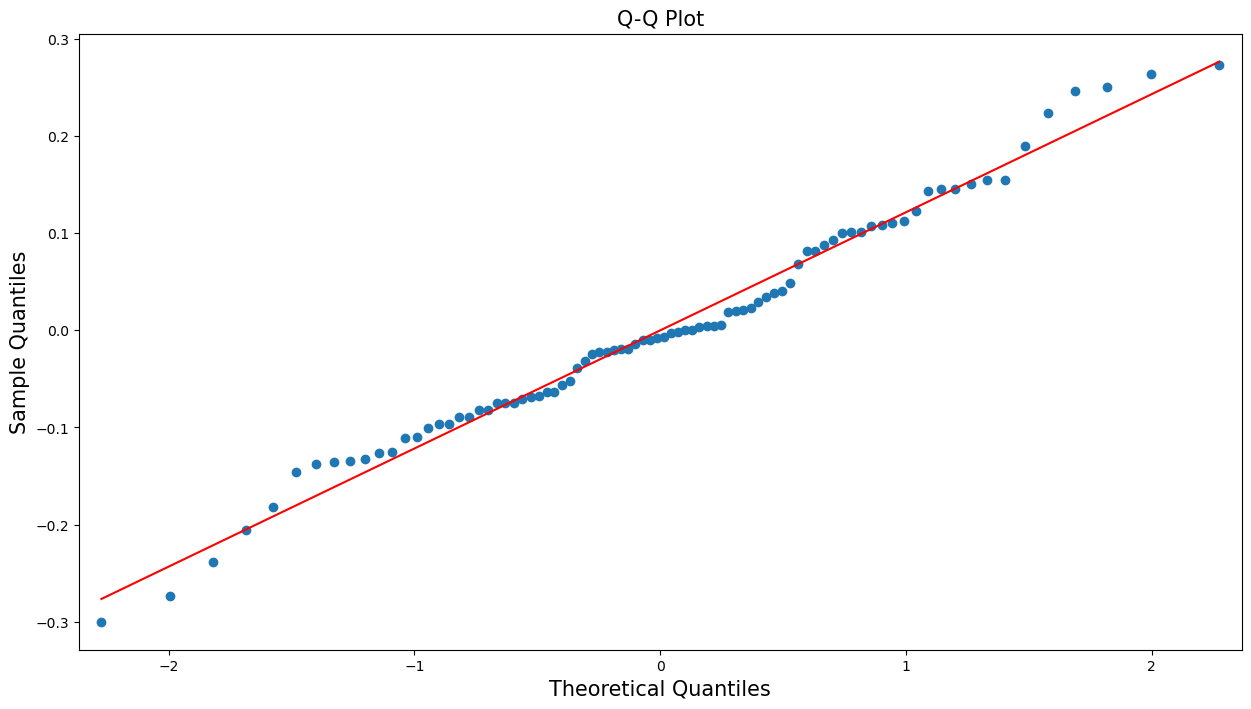

In [98]:
from statsmodels.graphics.gofplots import qqplot
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_full_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation:**

*The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. All of the points are close to the diagonal line, we conclude that the residuals  follow a normal distribution.*

### Model Performance 2

***Let us do some predictions using the train and test dataset.***

In [84]:
# predict the output of the target variable from the train data 
train_pred = MLR_full_model.predict(x_train_sig)

# predict the output of the target variable from the test data
test_pred = MLR_full_model.predict(x_test_sig)

In [85]:
# calculate the MSE using the "mean_squared_error" function
# calculate the MSE for the train data
# round the value upto 4 digits using 'round()'
mse_train = round(mean_squared_error(y_train_sig, train_pred),4)
# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)
# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test_sig, test_pred),4)
# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  0.0137
Mean Squared Error (MSE) on test set:  0.0276


In [86]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train_sig, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test_sig, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  0.1171
Root Mean Squared Error (RMSE) on test set:  0.1661


### Forward Selection

In [87]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

# initiate linear regression model to use in feature selection
linreg = LinearRegression()

# build forward feature selection
# pass the regression model to 'estimator'
# pass number of required feartures to 'k_features'. Here '12' is the stopping rule
# 'forward=True' performs forward selection method
# 'verbose=1' returns the number of features at the corresponding step
# 'verbose=2' returns the R-squared scores and the number of features at the corresponding step
# 'scoring=r2' considers R-squared score to select the feature
linreg_forward = sfs(estimator=linreg, k_features = 'best', forward=True,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
# we use the independent variables including intersection variable 'T_out*RH_out'
sfs_forward = linreg_forward.fit(x_train_sig, y_train_sig)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.4s finished

[2023-12-06 18:50:34] Features: 1/28 -- score: 0.3843893328811748[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.6s finished

[2023-12-06 18:50:34] Features: 2/28 -- score: 0.5037128134989889[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.4s finished

[2023-12-06 18:50:35] Features: 3/28 -- score: 0.5963003527379722[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [88]:
# print the selected feature names when k_features = 12
print('Features selelected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selelected using forward selection are: 
('drivewheel', 'enginelocation', 'hatchback', 'enginetype(ohcv)', 'CarCompany(audi)', 'CarCompany(bmw)', 'CarCompany(chevrolet)', 'CarCompany(dodge)', 'CarCompany(mercury)', 'CarCompany(mitsubishi)', 'CarCompany(nissan)', 'CarCompany(plymouth)', 'CarCompany(porsche)', 'CarCompany(saab)', 'CarCompany(toyota)')

R-Squared:  0.6857665743438358


### Performance of the model

**Interpretation:**

*The R-squared value for full model is 0.969 and Adj. R-squared value is 0.936 .*

*After applying VIF method the R-squared value for the model  0.788 and  Adj. R-squared  value is 0.709 and R-squared value=0.6857 for forward feature selection method 

The reason is multicollinearity reduction,leading to a clearer understanding of the individual predictor's contribution*

*(RMSE) on test set:  0.1868
(RMSE) on test set:  0.1661
The decrease in RMSE from  0.1868 to 0.1661 after applying VIF method suggests an improvement in the model's predicting performance on the test set.It enhanced accuracy and effectiveness after addressing multicollinearity using the VIF method .*

### Observations from the model

*According to the forward selection method the important features are ,*

* 1.type of drive wheel
* 2.carbody-hatchback type
* 3.enginetype - ohcv
* 4.car company - audi,bmw,chevrolet,dodge,mercury,mitsubishi,nissan,plymouth,porsche,saab,toyota

**Conclusion**

*We can conclude that wheelbase,carbody,enginetype and car company features are significant in predicting the price of a car.*

*Those variables describe the price of a car*